In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Загружаем и обрабатываем датасет

In [5]:
data= pd.read_csv('civil_war_battles.csv')
data.head()

,cwsac_id,battle_name,start_date,end_date,result,duration,casualities,preservation,significance,study_area,core_area,potnr_boundary,significance_ed,battle_type,lat,long,state,casualties_kwm_var
0,AL001,Day's Gap,1863-04-30,1863-04-30,Union,1.0,88.0,III.3,C,5410.35,1084.76,2933.02,D,Action,34.3096,-87.0110,AL,0.166667
1,AL002,Athens,1864-01-26,1864-01-26,Union,1.0,50.0,IV.1,D,21919.82,2274.85,2998.41,D,Attack,34.8033,-86.9722,AL,16.666667
2,AL003,Mobile Bay,1864-08-02,1864-08-23,Union,22.0,1822.0,I.1,A,36916.74,16130.48,34927.42,NaN,Naval Operations,30.2410,-88.0530,AL,833.416667
3,AL004,Decatur,1864-10-26,1864-10-29,Union,4.0,605.0,IV.2,C,14623.51,1148.87,0.00,C,Demonstration,34.6140,-86.9860,AL,833.416667
4,AL005,Spanish Fort,1865-03-27,1865-04-08,Union,12.0,1401.0,IV.2,B,3742.16,2282.27,0.00,B,Siege & Capture,30.6843,-87.9164,AL,0.166667


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 18 columns):
cwsac_id              381 non-null object
battle_name           381 non-null object
start_date            381 non-null object
end_date              381 non-null object
result                381 non-null object
duration              380 non-null float64
casualities           357 non-null float64
preservation          369 non-null object
significance          381 non-null object
study_area            379 non-null float64
core_area             379 non-null float64
potnr_boundary        358 non-null float64
significance_ed       264 non-null object
battle_type           381 non-null object
lat                   381 non-null float64
long                  381 non-null float64
state                 381 non-null object
casualties_kwm_var    344 non-null float64
dtypes: float64(8), object(10)
memory usage: 53.7+ KB


In [7]:
data.isnull().sum()

cwsac_id                0
battle_name             0
start_date              0
end_date                0
result                  0
duration                1
casualities            24
preservation           12
significance            0
study_area              2
core_area               2
potnr_boundary         23
significance_ed       117
battle_type             0
lat                     0
long                    0
state                   0
casualties_kwm_var     37
dtype: int64

In [8]:
data2 = data.copy()

In [9]:
data2 = data.drop(['significance_ed','preservation','casualties_kwm_var'], axis=1)

In [10]:
data2.isnull().sum()

cwsac_id           0
battle_name        0
start_date         0
end_date           0
result             0
duration           1
casualities       24
significance       0
study_area         2
core_area          2
potnr_boundary    23
battle_type        0
lat                0
long               0
state              0
dtype: int64

In [11]:
data2 = data2.dropna(how='any')
data2.head()

,cwsac_id,battle_name,start_date,end_date,result,duration,casualities,significance,study_area,core_area,potnr_boundary,battle_type,lat,long,state
0,AL001,Day's Gap,1863-04-30,1863-04-30,Union,1.0,88.0,C,5410.35,1084.76,2933.02,Action,34.3096,-87.0110,AL
1,AL002,Athens,1864-01-26,1864-01-26,Union,1.0,50.0,D,21919.82,2274.85,2998.41,Attack,34.8033,-86.9722,AL
2,AL003,Mobile Bay,1864-08-02,1864-08-23,Union,22.0,1822.0,A,36916.74,16130.48,34927.42,Naval Operations,30.2410,-88.0530,AL
3,AL004,Decatur,1864-10-26,1864-10-29,Union,4.0,605.0,C,14623.51,1148.87,0.00,Demonstration,34.6140,-86.9860,AL
4,AL005,Spanish Fort,1865-03-27,1865-04-08,Union,12.0,1401.0,B,3742.16,2282.27,0.00,Siege & Capture,30.6843,-87.9164,AL


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 379
Data columns (total 15 columns):
cwsac_id          334 non-null object
battle_name       334 non-null object
start_date        334 non-null object
end_date          334 non-null object
result            334 non-null object
duration          334 non-null float64
casualities       334 non-null float64
significance      334 non-null object
study_area        334 non-null float64
core_area         334 non-null float64
potnr_boundary    334 non-null float64
battle_type       334 non-null object
lat               334 non-null float64
long              334 non-null float64
state             334 non-null object
dtypes: float64(7), object(8)
memory usage: 41.8+ KB


Чуть-чуть попыток построить красивые графики

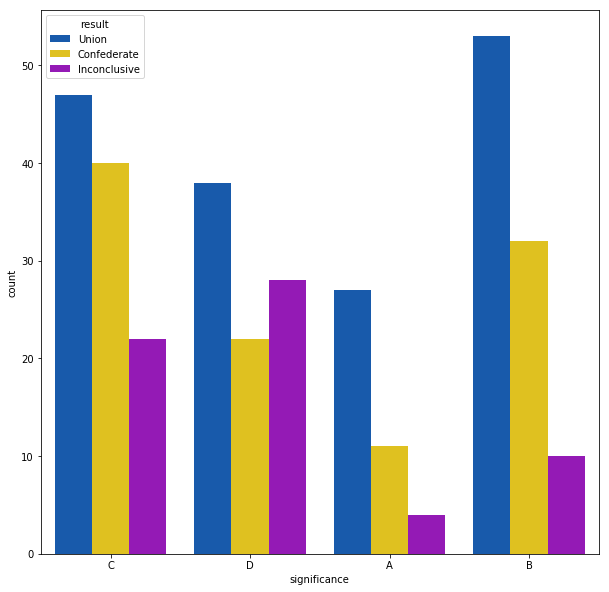

In [13]:
plt.figure(figsize=(10, 10))
sns.countplot(x='significance', hue='result', data=data2, palette='prism')

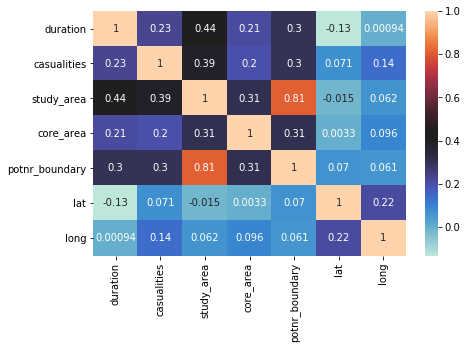

In [14]:
plt.figure(figsize=(7, 4.5))
sns.heatmap(data2.corr(), annot=True, cmap='icefire')
plt.savefig('cmap.png')

In [15]:
data2 = data2.drop(['potnr_boundary'], axis=1)

In [16]:
data2.head()

,cwsac_id,battle_name,start_date,end_date,result,duration,casualities,significance,study_area,core_area,battle_type,lat,long,state
0,AL001,Day's Gap,1863-04-30,1863-04-30,Union,1.0,88.0,C,5410.35,1084.76,Action,34.3096,-87.0110,AL
1,AL002,Athens,1864-01-26,1864-01-26,Union,1.0,50.0,D,21919.82,2274.85,Attack,34.8033,-86.9722,AL
2,AL003,Mobile Bay,1864-08-02,1864-08-23,Union,22.0,1822.0,A,36916.74,16130.48,Naval Operations,30.2410,-88.0530,AL
3,AL004,Decatur,1864-10-26,1864-10-29,Union,4.0,605.0,C,14623.51,1148.87,Demonstration,34.6140,-86.9860,AL
4,AL005,Spanish Fort,1865-03-27,1865-04-08,Union,12.0,1401.0,B,3742.16,2282.27,Siege & Capture,30.6843,-87.9164,AL


In [17]:
data2.describe().round(2) # твбличка с описательными статистиками, округленными до 2 знаков после запятой

,duration,casualities,study_area,core_area,lat,long
count,334.00,334.00,334.00,334.00,334.00,334.00
mean,2.59,2527.51,9796.61,2918.60,36.22,-84.05
std,5.24,5536.85,9487.33,6591.85,3.05,7.02
min,1.00,0.00,564.83,59.53,25.95,-111.91
25%,1.00,221.25,3742.92,720.62,34.33,-90.51
50%,1.00,662.50,6981.28,1664.15,37.07,-81.77
75%,2.00,2000.00,11946.81,3108.08,38.30,-77.69
max,48.00,51000.00,63960.79,87875.32,47.43,-75.67


In [18]:
significance_dict = {
    'A' : 4,
    'B' : 3,
    'C' : 2,
    'D' : 1,
} # делаем порядковый признак пригодным для того, чтобы засунуть его в классификационную модель

In [19]:
data2.significance = data.significance.replace(to_replace=significance_dict)

In [20]:
data2.head() 

,cwsac_id,battle_name,start_date,end_date,result,duration,casualities,significance,study_area,core_area,battle_type,lat,long,state
0,AL001,Day's Gap,1863-04-30,1863-04-30,Union,1.0,88.0,2,5410.35,1084.76,Action,34.3096,-87.0110,AL
1,AL002,Athens,1864-01-26,1864-01-26,Union,1.0,50.0,1,21919.82,2274.85,Attack,34.8033,-86.9722,AL
2,AL003,Mobile Bay,1864-08-02,1864-08-23,Union,22.0,1822.0,4,36916.74,16130.48,Naval Operations,30.2410,-88.0530,AL
3,AL004,Decatur,1864-10-26,1864-10-29,Union,4.0,605.0,2,14623.51,1148.87,Demonstration,34.6140,-86.9860,AL
4,AL005,Spanish Fort,1865-03-27,1865-04-08,Union,12.0,1401.0,3,3742.16,2282.27,Siege & Capture,30.6843,-87.9164,AL


Очень много классификационных моделей

In [21]:
Y1 = data2.result
X1 = data2[['significance']] 

In [22]:
X1_train, X1_val, Y1_train, Y1_val = train_test_split(X1, Y1, test_size = 0.3, random_state=42)
model1 = LogisticRegression()
model1.fit(X1_train, Y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
Y1_predicted = model1.predict(X1_val)
significance_accuracy = accuracy_score(Y1_val,Y1_predicted)

In [24]:
Y2 = data2.result
X2 = data2['study_area']

In [25]:
X2_train, X2_val, Y2_train, Y2_val = train_test_split(X2, Y2, test_size = 0.3, random_state=42)
model2 = LogisticRegression()
model2.fit(X2_train[:, np.newaxis], Y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
Y2_predicted = model2.predict(X2_val[:, np.newaxis])
study_accuracy = accuracy_score(Y2_val,Y2_predicted)

In [27]:
Y3 = data2.result
X3 = data2[['casualities']]

In [28]:
X3_train, X3_val, Y3_train, Y3_val = train_test_split(X3, Y3, test_size = 0.3, random_state=42)
model3 = LogisticRegression()
model3.fit(X3_train, Y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
Y3_predicted = model3.predict(X3_val)
casualities_acuracy = accuracy_score(Y3_val,Y3_predicted)

In [30]:
Y4 = data2.result
X4 = data2[['core_area']] 

In [31]:
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size = 0.3, random_state=42)
model4 = LogisticRegression()
model4.fit(X4_train, Y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
Y4_predicted = model4.predict(X4_val)
core_accuracy = accuracy_score(Y4_val,Y4_predicted)

In [33]:
Y5 = data2.result
X5 = data2[['duration']]

In [34]:
X5_train, X5_val, Y5_train, Y5_val = train_test_split(X5, Y5, test_size = 0.3, random_state=42)
model5 = LogisticRegression()
model5.fit(X5_train, Y5_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
Y5_predicted = model5.predict(X5_val)
duration_accuracy = accuracy_score(Y5_val,Y5_predicted)

# I'm a stupid bitch / get_dummies

In [36]:
data2 = pd.get_dummies(data2, columns=['battle_type', 'state']) 
# теперь преобразовываем номинальные признаки тоже, чтобы они могли участвовать в классификационной модели

In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 379
Data columns (total 59 columns):
cwsac_id                             334 non-null object
battle_name                          334 non-null object
start_date                           334 non-null object
end_date                             334 non-null object
result                               334 non-null object
duration                             334 non-null float64
casualities                          334 non-null float64
significance                         334 non-null int64
study_area                           334 non-null float64
core_area                            334 non-null float64
lat                                  334 non-null float64
long                                 334 non-null float64
battle_type_Action                   334 non-null uint8
battle_type_Advance & Siege          334 non-null uint8
battle_type_Assault                  334 non-null uint8
battle_type_Attack                   3

In [38]:
Y6 = data2.result
X6 = data2[['battle_type_Action', 
           'battle_type_Advance & Siege', 
           'battle_type_Assault', 
           'battle_type_Attack', 
           'battle_type_Battle',
           'battle_type_Bombardment',
           'battle_type_Bombardment & Capture',
           'battle_type_Capture',
           'battle_type_Combat',
           'battle_type_Demonstration', 
           'battle_type_Engagement',
           'battle_type_Expedition',
           'battle_type_Massacre',
           'battle_type_Naval',
           'battle_type_Naval Operations',
           'battle_type_Occupation',
           'battle_type_Operation',
           'battle_type_Recapture',
           'battle_type_Siege',
           'battle_type_Siege & Capture',
           'battle_type_Skirmish'
]] #0.5346534653465347

In [39]:
X6_train, X6_val, Y6_train, Y6_val = train_test_split(X6, Y6, test_size = 0.3, random_state=42)
model6 = LogisticRegression()
model6.fit(X6_train, Y6_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
Y6_predicted = model6.predict(X6_val)
type_accuracy = accuracy_score(Y6_val,Y6_predicted)

In [41]:
Y7 = data2.result
X7 = data2[['state_AL',
           'state_AR',
           'state_CO',
           'state_DC',
           'state_FL',
           'state_GA',
           'state_ID',
           'state_IN',
           'state_KS',
           'state_KY',
           'state_LA',
           'state_MD',
           'state_MN',
           'state_MO',
           'state_MS',
           'state_NC',
           'state_ND',
           'state_NM',
           'state_OH',
           'state_OK',
           'state_PA',
           'state_SC',
           'state_TN',
           'state_TX',
           'state_VA',
           'state_WV',
]]

In [42]:
X7_train, X7_val, Y7_train, Y7_val = train_test_split(X7, Y7, test_size = 0.3, random_state=42)
model7 = LogisticRegression()
model7.fit(X7_train, Y7_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
Y7_predicted = model7.predict(X7_val)
state_accuracy = accuracy_score(Y7_val,Y7_predicted)

In [44]:
Y8 = data2.result
X8 = data2[['long', 'lat']]

In [45]:
X8_train, X8_val, Y8_train, Y8_val = train_test_split(X8, Y8, test_size = 0.3, random_state=42)
model8 = LogisticRegression()
model8.fit(X8_train, Y8_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
Y8_predicted = model8.predict(X8_val)
long_lat_accuracy = accuracy_score(Y8_val,Y8_predicted)

In [47]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 379
Data columns (total 59 columns):
cwsac_id                             334 non-null object
battle_name                          334 non-null object
start_date                           334 non-null object
end_date                             334 non-null object
result                               334 non-null object
duration                             334 non-null float64
casualities                          334 non-null float64
significance                         334 non-null int64
study_area                           334 non-null float64
core_area                            334 non-null float64
lat                                  334 non-null float64
long                                 334 non-null float64
battle_type_Action                   334 non-null uint8
battle_type_Advance & Siege          334 non-null uint8
battle_type_Assault                  334 non-null uint8
battle_type_Attack                   3

In [48]:
Y111 = data2.result
X111 = data2[['duration', 
           'casualities', 
           'significance',
           'study_area', 
           'core_area', 
           'lat', 
           'long',
           'battle_type_Action', 
           'battle_type_Advance & Siege', 
           'battle_type_Assault', 
           'battle_type_Attack', 
           'battle_type_Battle',
           'battle_type_Bombardment',
           'battle_type_Bombardment & Capture',
           'battle_type_Capture',
           'battle_type_Combat',
           'battle_type_Demonstration', 
           'battle_type_Engagement',
           'battle_type_Expedition',
           'battle_type_Massacre',
           'battle_type_Naval',
           'battle_type_Naval Operations',
           'battle_type_Occupation',
           'battle_type_Operation',
           'battle_type_Recapture',
           'battle_type_Siege',
           'battle_type_Siege & Capture',
           'battle_type_Skirmish',
           'state_AL',
           'state_AR',
           'state_CO',
           'state_DC',
           'state_FL',
           'state_GA',
           'state_ID',
           'state_IN',
           'state_KS',
           'state_KY',
           'state_LA',
           'state_MD',
           'state_MN',
           'state_MO',
           'state_MS',
           'state_NC',
           'state_ND',
           'state_NM',
           'state_OH',
           'state_OK',
           'state_PA',
           'state_SC',
           'state_TN',
           'state_TX',
           'state_VA',
           'state_WV',
]]

In [49]:
X111_train, X111_val, Y111_train, Y111_val = train_test_split(X111, Y111, test_size = 0.3, random_state=42)
model11 = LogisticRegression()
model11.fit(X111_train, Y111_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
Y111_predicted = model11.predict(X111_val)
total_accuracy = accuracy_score(Y111_val,Y111_predicted)

In [51]:
Y10 = data2.result
X10 = data2[['duration', 
           'casualities', 
           'battle_type_Action', 
           'battle_type_Advance & Siege', 
           'battle_type_Assault', 
           'battle_type_Attack', 
           'battle_type_Battle',
           'battle_type_Bombardment',
           'battle_type_Bombardment & Capture',
           'battle_type_Capture',
           'battle_type_Combat',
           'battle_type_Demonstration', 
           'battle_type_Engagement',
           'battle_type_Expedition',
           'battle_type_Massacre',
           'battle_type_Naval',
           'battle_type_Naval Operations',
           'battle_type_Occupation',
           'battle_type_Operation',
           'battle_type_Recapture',
           'battle_type_Siege',
           'battle_type_Siege & Capture',
           'battle_type_Skirmish',
           'state_AL',
           'state_AR',
           'state_CO',
           'state_DC',
           'state_FL',
           'state_GA',
           'state_ID',
           'state_IN',
           'state_KS',
           'state_KY',
           'state_LA',
           'state_MD',
           'state_MN',
           'state_MO',
           'state_MS',
           'state_NC',
           'state_ND',
           'state_NM',
           'state_OH',
           'state_OK',
           'state_PA',
           'state_SC',
           'state_TN',
           'state_TX',
           'state_VA',
           'state_WV',
]]

In [52]:
X10_train, X10_val, Y10_train, Y10_val = train_test_split(X10, Y10, test_size = 0.3, random_state=42)
model10 = LogisticRegression()
model10.fit(X10_train, Y10_train)

Y10_predicted = model10.predict(X10_val)
significant_accuracy = accuracy_score(Y10_val,Y10_predicted)

In [53]:
Y12 = data2.result
X12 = data2 [['significance',
           'study_area', 
           'core_area', 
           'lat', 
           'long',
]]

In [54]:
X12_train, X12_val, Y12_train, Y12_val = train_test_split(X12, Y12, test_size = 0.3, random_state=42)
model12 = LogisticRegression()
model12.fit(X12_train, Y12_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
Y12_predicted = model12.predict(X12_val)
insignificant_accuracy = accuracy_score(Y12_val,Y12_predicted)

А теперь уже строим нормальные графики, которые с высокой вероятностью войдут в постер

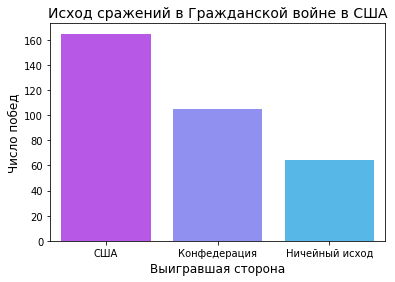

In [56]:
sns.countplot(x="result", palette="cool_r", data=data2)
plt.xlabel('Выигравшая сторона', fontsize=12)
plt.ylabel('Число побед', fontsize=12)
plt.title('Исход сражений в Гражданской войне в США', fontsize=14)
plt.xticks(np.arange(3), ('США', 'Конфедерация', 'Ничейный исход'))
plt.savefig('victory.png')

casualities_acuracy, duration_accuracy, state_accuracy, long_lat_accuracy, 
     type_accuracy, significance_accuracy, study_accuracy, core_accuracy,

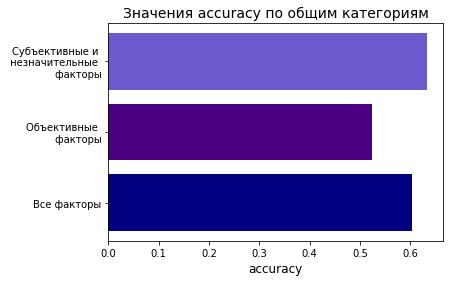

<Figure size 432x288 with 0 Axes>

In [57]:
x = ['Все факторы', 'Объективные \n факторы', 'Субъективные и \n незначительные \n факторы']
y = [total_accuracy, significant_accuracy, insignificant_accuracy]
colors = ('navy', 'indigo', 'slateblue')

plt.barh(x, y, color = colors)

plt.xlabel('accuracy', fontsize = 12)
plt.title('Значения accuracy по общим категориям', fontsize = 14)

plt.show()
plt.savefig('mur.png')

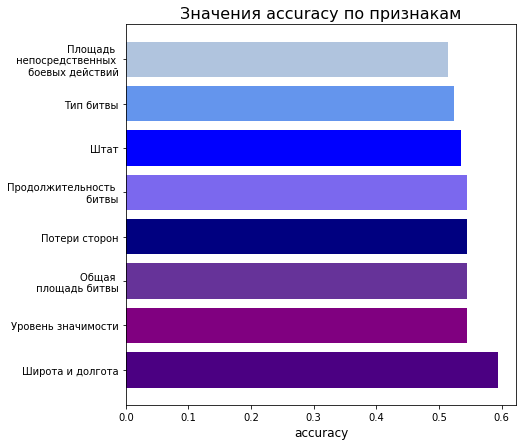

In [58]:
x = ['Широта и долгота',
     'Уровень значимости',
     'Общая \n площадь битвы',
     'Потери сторон',
     'Продолжительность \n битвы', 
     'Штат', 
     'Тип битвы',
     'Площадь \n непосредственных \n боевых действий'
    ]
y = [long_lat_accuracy,
     significance_accuracy,
     study_accuracy,casualities_acuracy,
     duration_accuracy, 
     core_accuracy,
     state_accuracy, 
     type_accuracy,
    ]

plt.figure(figsize = (7,7))
colours = ['indigo', 'purple', 'rebeccapurple','navy', 'mediumslateblue',  'blue', 'cornflowerblue', 'lightsteelblue']
plt.xlabel('accuracy', fontsize = 12)
plt.title('Значения accuracy по признакам', fontsize = 16)

plt.barh(x, y, color=colours)
plt.show()

In [59]:
data2['result'].value_counts(sort=True)

Union           165
Confederate     105
Inconclusive     64
Name: result, dtype: int64

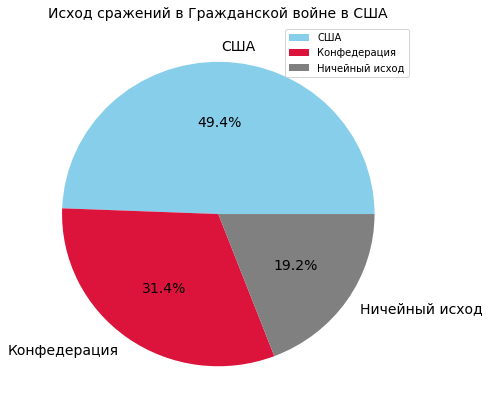

In [60]:
slices = [165,105, 64]

victory = ['США', 'Конфедерация', 'Ничейный исход']

plt.figure(figsize = (7,7))
cols = ['skyblue', 'crimson', 'grey']
plt.pie(slices, labels=victory, colors=cols, 
        autopct='%1.1f%%', textprops={'fontsize': 14}
       )
plt.title('Исход сражений в Гражданской войне в США', fontsize=14)
plt.legend(loc='upper right')
plt.savefig('result.png')


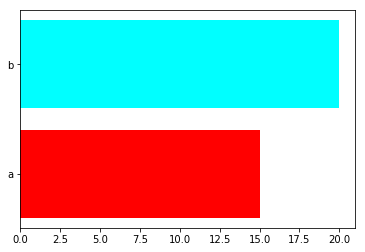

In [61]:
a = 15
b = 20
x1 = ['a', 'b']
y1 = [a, b]
colors1 =['r', 'cyan']
plt.barh(x1, y1, color = colors1)
plt.show()

In [62]:
print(total_accuracy)

0.6039603960396039


In [63]:
print(insignificant_accuracy)

0.6336633663366337
